In [111]:
import scipy.stats as sts
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import random


def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    
    plt.acorr(
    x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

In [57]:
tf1 = sts.norm(-4, 0.5)
tf2 = sts.norm(4, 1)


In [112]:
def Hastings(start, epsilon, it):
    
    samp = [start]
    c = start
    acc = 0
    for _ in range(it):
        q = sts.norm(c, epsilon)
        cn = q.rvs(size = 1)[0]

        a = (tf1.pdf(cn) + tf2.pdf(cn) ) / (tf1.pdf(c) + tf2.pdf(c))

        comp = random.random()

        if a > comp:
            acc += 1
            samp.append(cn)
            c = cn
        else:
            samp.append(c)
    print("accaptance rate: ", acc/1000)
    return samp

accaptance rate:  0.85


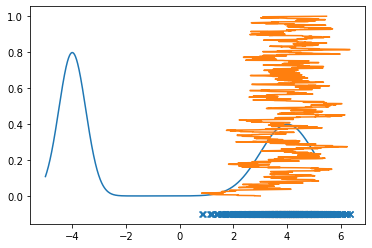

In [113]:
x = np.linspace(-5, 5, 1000)
y = tf1.pdf(x) + tf2.pdf(x)


x1 = Hastings(3, 0.5, 1000)



plt.plot(x, y)
plt.plot(x1, np.linspace(0, 1, 1001))
plt.scatter(x1, [-0.1 for _ in range(len(x1))], marker = 'x')

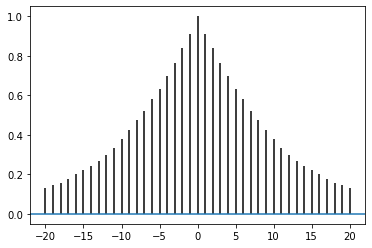

In [114]:
plot_acf(x1)

accaptance rate:  0.688


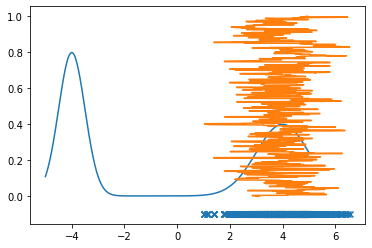

In [115]:
x = np.linspace(-5, 5, 1000)
y = tf1.pdf(x) + tf2.pdf(x)


x1 = Hastings(3, 1, 1000)



plt.plot(x, y)
plt.plot(x1, np.linspace(0, 1, 1001))
plt.scatter(x1, [-0.1 for _ in range(len(x1))], marker = 'x')

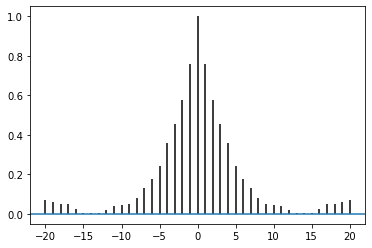

In [116]:
plot_acf(x1)

accaptance rate:  0.427


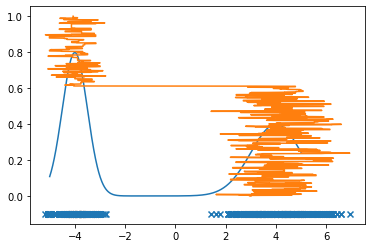

In [117]:
x = np.linspace(-5, 5, 1000)
y = tf1.pdf(x) + tf2.pdf(x)


x1 = Hastings(3, 2, 1000)



plt.plot(x, y)
plt.plot(x1, np.linspace(0, 1, 1001))
plt.scatter(x1, [-0.1 for _ in range(len(x1))], marker = 'x')

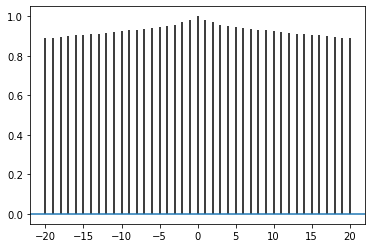

In [118]:
plot_acf(x1)

accaptance rate:  0.277


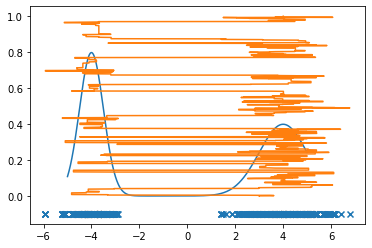

In [119]:
x = np.linspace(-5, 5, 1000)
y = tf1.pdf(x) + tf2.pdf(x)


x1 = Hastings(3, 4, 1000)



plt.plot(x, y)
plt.plot(x1, np.linspace(0, 1, 1001))
plt.scatter(x1, [-0.1 for _ in range(len(x1))], marker = 'x')

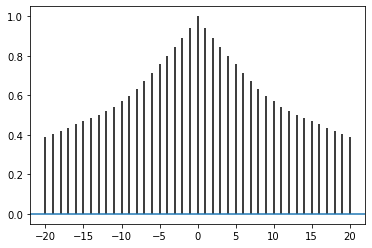

In [120]:
plot_acf(x1)

Answers:

1. We can see that the acceptance rate is falls as the step size increases. This is, becasause with samll steps we slowely approch a maximum, and therefore get a lot of points that have a high chace of being accapted. If we have large steps, we will also get close to a maximum, but we will get there faster, and we will reject a lot of points from there, because we have jump far away from it which given us a high probablility of rejection

2. We can see that the outocorrelation is especially low for a step size of 1 and also low for a step size of 0.5. It is higher for step sizes 2 and 4. 

3. I would say that the largest step size of 4 is the best. It has the disadvantage of a low accaptance rate and some correlation, but it is the only one that explores both modes and jumps between them. The first two step sizes only discover the first mode, so they will not be helpful. The step size of 2 discovers both, but it looks like it is gets stuck on the higher mdoe, so we will not get useful samples in the future. The step size of 4 generates samples from both modes and jumps between them, as we would expact form random samples. 

